In [219]:
# 초기 설정
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import os

In [220]:
# drive 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [221]:
# 한글 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
import matplotlib.font_manager as fm
font10 = fm.FontProperties(fname=path, size=10)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [222]:
!pip install catboost
!pip install lightgbm
!pip install xgboost

In [223]:
# 한글 폰트 경로 지정
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_manager.fontManager.addfont(font_path)
rc('font', family='NanumGothic')

In [224]:
# csv 해당 파일 불러오기
train_path = '/content/drive/MyDrive/card_train.csv'
test_path = '/content/drive/MyDrive/card_test.csv'

In [226]:
# train_df
train_df = pd.read_csv(train_path, encoding = 'utf-8-sig')

In [ ]:
# 열, 행 추출
train_df.shape

(70560, 738)

In [ ]:
# train_df 차트 드러내기
train_df.head()

,Unnamed: 0.1,대표결제일,대표결제방법코드,대표청구지고객주소구분코드,대표청구서수령지구분코드,청구서수령방법,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,청구금액_B0,...,컨택건수_CA_청구서_R6M,컨택건수_이용유도_청구서_R6M,컨택건수_이용유도_인터넷_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_채권_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M,ID,Segment.1
0,61865,1,자동이체,주거지,우편,우편,1,1,1,466,...,0,5,5,0,0,0,1회 이상,1일 이상,TRAIN_000389,E
1,8547,13,자동이체,미확인,이메일,이메일,1,1,1,2417,...,0,4,6,0,0,0,1회 이상,1일 이상,TRAIN_304152,D
2,43497,25,자동이체,주거지,우편,우편,0,0,0,0,...,2,4,2,0,0,0,5회 이상,5일 이상,TRAIN_356239,E
3,40785,25,자동이체,주거지,우편,우편,1,1,1,5931,...,0,0,0,0,0,0,1회 이상,1일 이상,TRAIN_122432,E
4,18999,25,자동이체,주거지,우편,우편,1,1,1,684,...,2,0,0,0,0,0,10회 이상,10일 이상,TRAIN_285200,E


In [ ]:
# 열만 추출
for i in train_df.columns:
  print(i)

Unnamed: 0.1
대표결제일
대표결제방법코드
대표청구지고객주소구분코드
대표청구서수령지구분코드
청구서수령방법
청구서발송여부_B0
청구서발송여부_R3M
청구서발송여부_R6M
청구금액_B0
청구금액_R3M
청구금액_R6M
포인트_마일리지_건별_B0M
포인트_마일리지_건별_R3M
포인트_포인트_건별_B0M
포인트_포인트_건별_R3M
포인트_마일리지_월적립_B0M
포인트_마일리지_월적립_R3M
포인트_포인트_월적립_B0M
포인트_포인트_월적립_R3M
포인트_적립포인트_R12M
포인트_적립포인트_R3M
포인트_이용포인트_R12M
포인트_이용포인트_R3M
포인트_잔여포인트_B0M
마일_적립포인트_R12M
마일_적립포인트_R3M
마일_이용포인트_R12M
마일_이용포인트_R3M
마일_잔여포인트_B0M
할인건수_R3M
할인금액_R3M
할인건수_B0M
할인금액_B0M
할인금액_청구서_R3M
할인금액_청구서_B0M
상환개월수_결제일_R6M
상환개월수_결제일_R3M
선결제건수_R6M
선결제건수_R3M
연체건수_R6M
연체건수_R3M
혜택수혜금액_R3M
포인트_마일리지_환산_B0M
혜택수혜금액
최초한도금액
카드이용한도금액
CA한도금액
일시상환론한도금액
월상환론한도금액
CA이자율_할인전
CL이자율_할인전
RV일시불이자율_할인전
RV현금서비스이자율_할인전
RV신청일자
RV약정청구율
RV최소결제비율
자발한도감액횟수_R12M
자발한도감액금액_R12M
자발한도감액후경과월
강제한도감액횟수_R12M
강제한도감액금액_R12M
강제한도감액후경과월
한도증액횟수_R12M
한도증액금액_R12M
한도증액후경과월
상향가능한도금액
상향가능CA한도금액
카드론동의여부
월상환론상향가능한도금액
RV전환가능여부
일시불ONLY전환가능여부
카드이용한도금액_B1M
카드이용한도금액_B2M
특별한도보유여부_R3M
연체감액여부_R3M
한도심사요청건수
한도요청거절건수
한도심사요청후경과월
한도심사거절후경과월
시장단기연체여부_R6M
rv최초시작후경과일
증감율_이용건수_신용_전월
증감율_이용건수_신판_전월
증감율_이용건수_일시불_전

In [ ]:
# keywords 추출 -> 포함되어 있는 keyword 만 따로 추출
usage_keywords = ["금액", "카드수", "이용", "연회비", "일시불"]
risk_keywords = ["한도", "채권", "연체", "채무", "RP"]
marketing_keywords = ["컨택", "캠페인", "이용유도"]
prediction_keywords = ["탈회", "불만제기", "경과", "청구"]

all_keywords = usage_keywords + risk_keywords + marketing_keywords + prediction_keywords

matched_columns = []
for col in train_df.columns:
    for keyword in all_keywords:
        if keyword in col:
            matched_columns.append(col)
            break

print(matched_columns)

['대표청구지고객주소구분코드', '대표청구서수령지구분코드', '청구서수령방법', '청구서발송여부_B0', '청구서발송여부_R3M', '청구서발송여부_R6M', '청구금액_B0', '청구금액_R3M', '청구금액_R6M', '포인트_이용포인트_R12M', '포인트_이용포인트_R3M', '마일_이용포인트_R12M', '마일_이용포인트_R3M', '할인금액_R3M', '할인금액_B0M', '할인금액_청구서_R3M', '할인금액_청구서_B0M', '연체건수_R6M', '연체건수_R3M', '혜택수혜금액_R3M', '혜택수혜금액', '최초한도금액', '카드이용한도금액', 'CA한도금액', '일시상환론한도금액', '월상환론한도금액', 'RV일시불이자율_할인전', 'RV약정청구율', '자발한도감액횟수_R12M', '자발한도감액금액_R12M', '자발한도감액후경과월', '강제한도감액횟수_R12M', '강제한도감액금액_R12M', '강제한도감액후경과월', '한도증액횟수_R12M', '한도증액금액_R12M', '한도증액후경과월', '상향가능한도금액', '상향가능CA한도금액', '월상환론상향가능한도금액', '일시불ONLY전환가능여부', '카드이용한도금액_B1M', '카드이용한도금액_B2M', '특별한도보유여부_R3M', '연체감액여부_R3M', '한도심사요청건수', '한도요청거절건수', '한도심사요청후경과월', '한도심사거절후경과월', '시장단기연체여부_R6M', 'rv최초시작후경과일', '증감율_이용건수_신용_전월', '증감율_이용건수_신판_전월', '증감율_이용건수_일시불_전월', '증감율_이용건수_할부_전월', '증감율_이용건수_CA_전월', '증감율_이용건수_체크_전월', '증감율_이용건수_카드론_전월', '증감율_이용금액_신용_전월', '증감율_이용금액_신판_전월', '증감율_이용금액_일시불_전월', '증감율_이용금액_할부_전월', '증감율_이용금액_CA_전월', '증감율_이용금액_체크_전월', '증감율_이용금액_카드론_전월', '증감율_이용건수_신용_분기', '증감율_

In [ ]:
# 정리된 내용 CSV파일로 저장
# (utf-8-sig로 인코딩) -> 한국어 깨짐 방지
matched_df = train_df[matched_columns]
matched_df.to_csv("matched_columns_output1.csv", index=False, encoding='utf-8-sig')

In [ ]:
# 정돈된 csv 불러오기
matched = '/content/matched_columns_output1.csv'

In [ ]:
matched_columns_output1 = pd.read_csv(matched)

In [ ]:
# 정돈된 행, 열 추출
matched_columns_output1.shape

(70560, 532)

In [ ]:
matched_columns_output1.head()

,대표청구지고객주소구분코드,대표청구서수령지구분코드,청구서수령방법,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,청구금액_B0,청구금액_R3M,청구금액_R6M,포인트_이용포인트_R12M,...,컨택건수_이용유도_EM_R6M,컨택건수_카드론_청구서_R6M,컨택건수_CA_청구서_R6M,컨택건수_이용유도_청구서_R6M,컨택건수_이용유도_인터넷_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_채권_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M
0,주거지,우편,우편,1,1,1,466,1678,3462,0,...,0,0,0,5,5,0,0,0,1회 이상,1일 이상
1,미확인,이메일,이메일,1,1,1,2417,7778,16768,0,...,56,0,0,4,6,0,0,0,1회 이상,1일 이상
2,주거지,우편,우편,0,0,0,0,0,254,0,...,1,0,2,4,2,0,0,0,5회 이상,5일 이상
3,주거지,우편,우편,1,1,1,5931,15957,34480,9051,...,13,0,0,0,0,0,0,0,1회 이상,1일 이상
4,주거지,우편,우편,1,1,1,684,2661,5642,0,...,0,0,2,0,0,0,0,0,10회 이상,10일 이상


In [ ]:
# 다운로드
from google.colab import files
files.download("matched_columns_output1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load dataset - 중요도
train_df = pd.read_csv('/content/matched_columns_output1.csv', encoding='utf-8-sig')

# 타겟 불러오기
y = pd.read_csv('/content/drive/MyDrive/card_train.csv', encoding='utf-8-sig')["Segment"]

In [ ]:
def select_features_by_keywords(df, keywords):
    return df[[col for col in df.columns if any(k in col for k in keywords)]]

In [ ]:
def train_model_with_keywords(X, y):
    X = X.fillna("missing")
    for col in X.select_dtypes(include="object").columns:
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    model = LGBMClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = f1_score(y_val, y_pred, average="macro")
    return model, score

In [ ]:
# 모델 훈련
def train_model_with_keywords(X, y):
    from sklearn.preprocessing import LabelEncoder
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import f1_score
    from lightgbm import LGBMClassifier

    X = X.fillna("missing")
    for col in X.select_dtypes(include="object").columns:
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    model = LGBMClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = f1_score(y_val, y_pred, average="macro")
    return model, score

In [ ]:
# 중요도 시각화 함
def plot_feature_importance(model, feature_names, top_n=30):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    importances = model.feature_importances_
    indices = np.argsort(importances)[-top_n:]
    plt.figure(figsize=(8, 10))
    sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices])
    plt.title("Top Feature Importances")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.209304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 53589
[LightGBM] [Info] Number of data points in the train set: 56448, number of used features: 387
[LightGBM] [Info] Start training from score -7.850033
[LightGBM] [Info] Start training from score -9.842463
[LightGBM] [Info] Start training from score -2.933708
[LightGBM] [Info] Start training from score -1.927236
[LightGBM] [Info] Start training from score -0.222134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


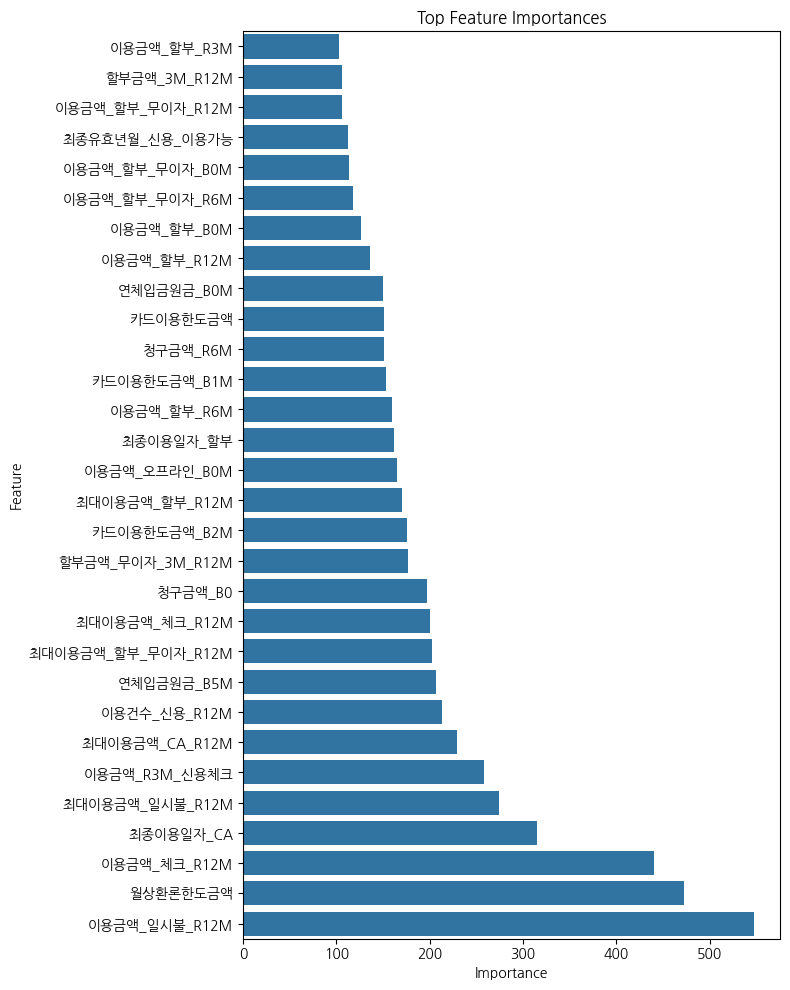

In [ ]:
# 실험: 키워드만 바꿔가며 반복
keywords = ["이용", "금액", "연체"]
X_selected = select_features_by_keywords(train_df, keywords)
model, score = train_model_with_keywords(X_selected, y)

print(f"Macro F1 score: {score:.4f}")
plot_feature_importance(model, X_selected.columns)

In [ ]:
# 상위 집단 키워드 설정 (8개)
# 임의 지정한 것.
top_8_keywords = ["일시불", "금액", "카드", "연체", "경과", "한도", "증감율", "이용유도"]
keywords = ["청구","이용금액","평잔","RP","잔액","이용건수","포인트","컨택","금액"]

In [ ]:
# 중복 제거해서 합치기
combined_keywords = list(set(top_8_keywords + keywords))

# 반드시 포함할 키워드 별도 정의
must_include_keywords = ["연체", "탈회"]

In [ ]:
for kw in top_8_keywords:
    cols = [c for c in train_df.columns if kw in c]
    print(f"{kw} 키워드 컬럼 개수: {len(cols)}")

일시불 키워드 컬럼 개수: 40
금액 키워드 컬럼 개수: 178
카드 키워드 컬럼 개수: 60
연체 키워드 컬럼 개수: 29
경과 키워드 컬럼 개수: 38
한도 키워드 컬럼 개수: 36
증감율 키워드 컬럼 개수: 28
이용유도 키워드 컬럼 개수: 11


In [ ]:
# 키워드 기반 피처 선택 함
def select_features_by_keywords(df, keywords):
    return df[[col for col in df.columns if any(k in col for k in keywords)]]

In [ ]:
# must_include 컬럼 강제 포함
X_selected = select_features_by_keywords(train_df, combined_keywords)
must_include_cols = [col for col in train_df.columns if any(k in col for k in must_include_keywords)]

In [ ]:
# must_include_cols 중 이미 X_selected에 포함되지 않은 컬럼을 추가
additional_cols = [col for col in must_include_cols if col not in X_selected.columns]
X_selected = pd.concat([X_selected, train_df[additional_cols]], axis=1)

In [ ]:
# 모델 학습 함수
def train_model_with_keywords(X, y):
    X = X.fillna("missing")
    for col in X.select_dtypes(include="object").columns:
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    model = LGBMClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = f1_score(y_val, y_pred, average="macro")
    return model, score

In [ ]:
# 중요도 시각화 함수
def plot_feature_importance(model, feature_names, top_n=30):
    importances = model.feature_importances_
    indices = np.argsort(importances)[-top_n:]
    plt.figure(figsize=(8, 10))
    sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices])
    plt.title("Top Feature Importances")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.246353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 60741
[LightGBM] [Info] Number of data points in the train set: 56448, number of used features: 442
[LightGBM] [Info] Start training from score -7.850033
[LightGBM] [Info] Start training from score -9.842463
[LightGBM] [Info] Start training from score -2.933708
[LightGBM] [Info] Start training from score -1.927236
[LightGBM] [Info] Start training from score -0.222134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


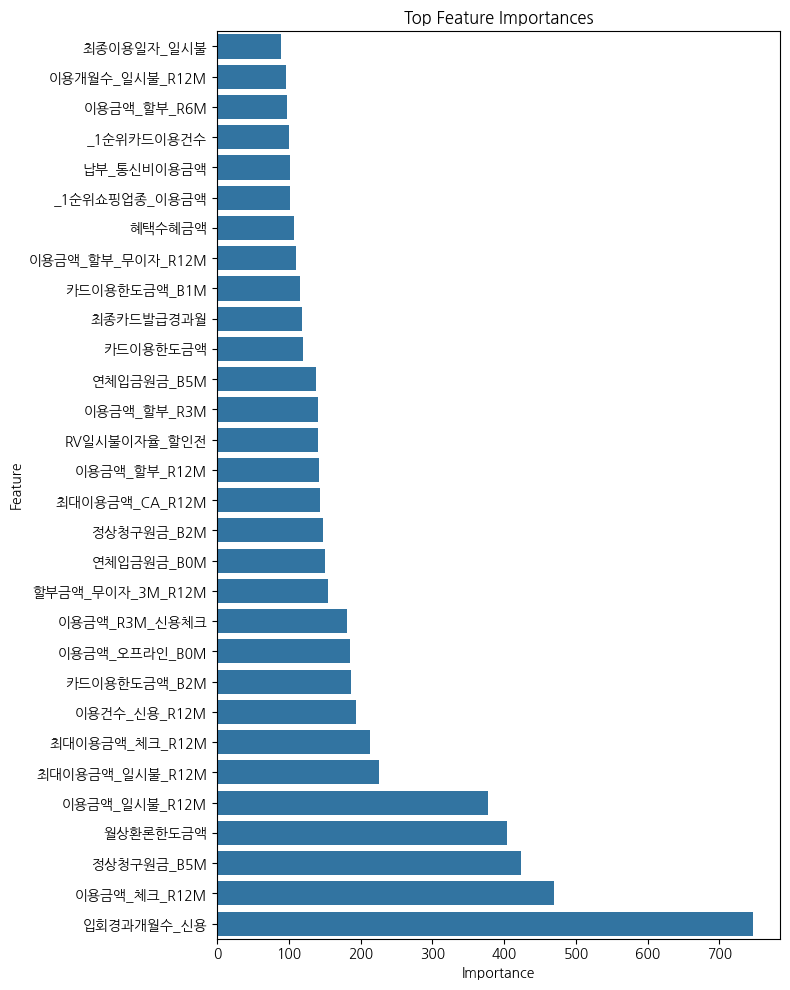

In [ ]:
# 모델 학습 및 평가
model, score = train_model_with_keywords(X_selected, y)
print(f"Macro F1 score: {score:.4f}")
plot_feature_importance(model, X_selected.columns)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9611
[LightGBM] [Info] Number of data points in the train set: 56448, number of used features: 40
[LightGBM] [Info] Start training from score -7.850033
[LightGBM] [Info] Start training from score -9.842463
[LightGBM] [Info] Start training from score -2.933708
[LightGBM] [Info] Start training from score -1.927236
[LightGBM] [Info] Start training from score -0.222134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

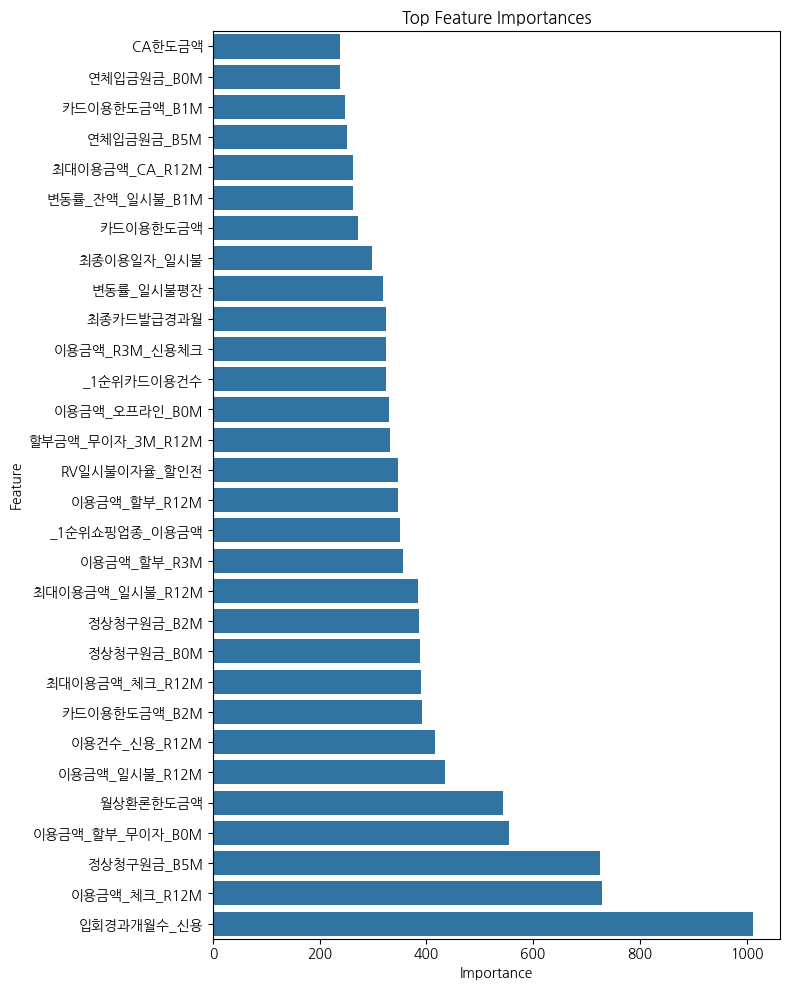

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14468
[LightGBM] [Info] Number of data points in the train set: 56448, number of used features: 60
[LightGBM] [Info] Start training from score -7.850033
[LightGBM] [Info] Start training from score -9.842463
[LightGBM] [Info] Start training from score -2.933708
[LightGBM] [Info] Start training from score -1.927236
[LightGBM] [Info] Start training from score -0.222134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

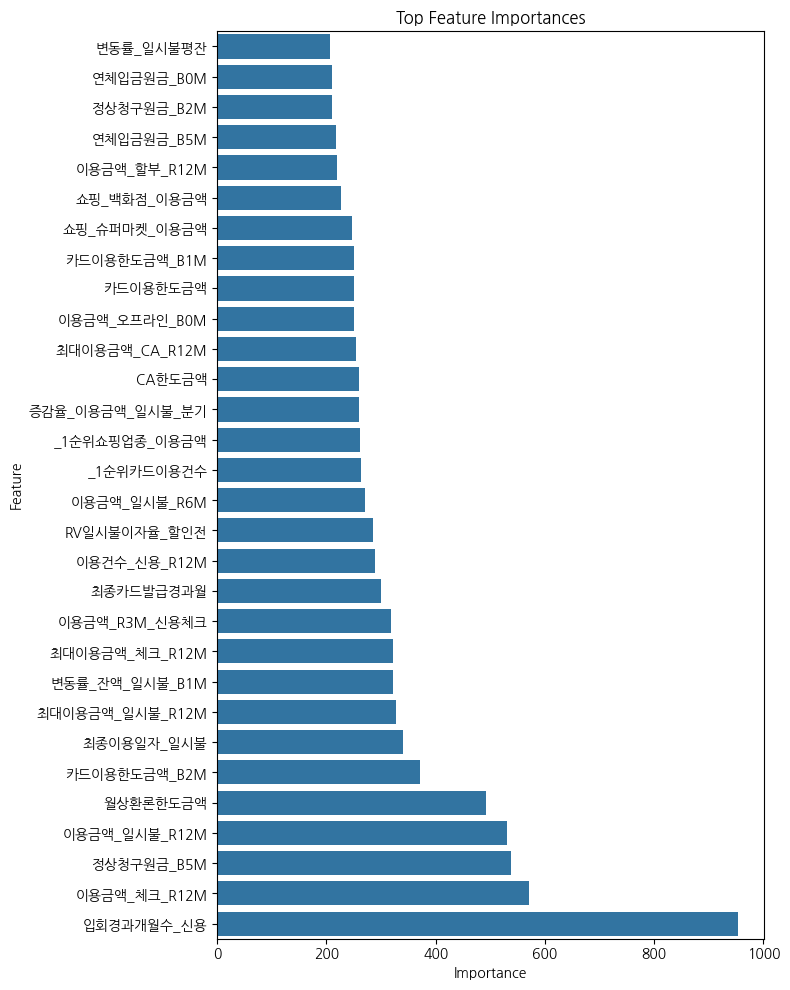

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18911
[LightGBM] [Info] Number of data points in the train set: 56448, number of used features: 80
[LightGBM] [Info] Start training from score -7.850033
[LightGBM] [Info] Start training from score -9.842463
[LightGBM] [Info] Start training from score -2.933708
[LightGBM] [Info] Start training from score -1.927236
[LightGBM] [Info] Start training from score -0.222134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

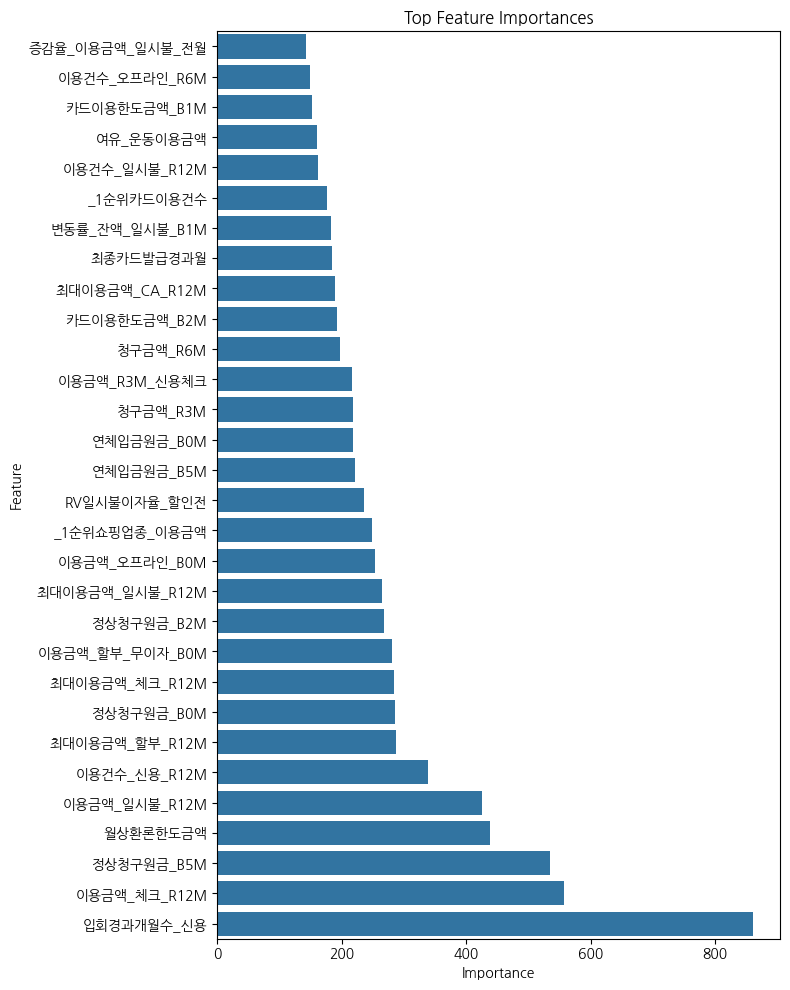

In [ ]:
# 중요도 기반 피처 선택 및 추가 실험 (40, 60, 80개 피처)
importances = model.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

for top_n in [40, 60, 80]:
    top_features = X_selected.columns[sorted_idx[:top_n]]
    model_sub, score_sub = train_model_with_keywords(X_selected[top_features], y)
    print(f"Top {top_n} features → F1 Score: {score_sub:.4f}")
    plot_feature_importance(model_sub, top_features)

In [ ]:
importances = model.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

# 상위 60개 피처만 선택
top_n = 60
top_features = X_selected.columns[sorted_idx[:top_n]]

print(f"\n📌 중요도 상위 {top_n}개 피처 목록 (한글만 출력):")
for feature in top_features:
    # 한글이 포함된 열 이름만 출력
    if any('\uac00' <= ch <= '\ud7a3' for ch in feature):
        print(feature)


📌 중요도 상위 60개 피처 목록 (한글만 출력):
청구서수령방법
포인트_이용포인트_R12M
증감율_이용금액_일시불_전월
자발한도감액횟수_R12M
포인트_이용포인트_R3M
청구금액_B0
대표청구서수령지구분코드
대표청구지고객주소구분코드
할인금액_B0M
증감율_이용건수_체크_전월
청구서발송여부_R3M
청구금액_R3M
청구서발송여부_B0
청구서발송여부_R6M
할인금액_청구서_R3M
강제한도감액금액_R12M
연체건수_R3M
최초한도금액
청구금액_R6M
강제한도감액횟수_R12M
할인금액_R3M
카드이용한도금액_B1M
마일_이용포인트_R3M
카드이용한도금액_B2M
증감율_이용건수_신용_분기
일시불ONLY전환가능여부
RV일시불이자율_할인전
혜택수혜금액
할인금액_청구서_B0M
카드이용한도금액
증감율_이용건수_일시불_분기
증감율_이용금액_신용_전월
시장단기연체여부_R6M
혜택수혜금액_R3M
마일_이용포인트_R12M
자발한도감액후경과월
한도요청거절건수
증감율_이용금액_CA_분기
증감율_이용금액_카드론_전월
증감율_이용금액_신판_전월
한도심사요청건수
한도증액횟수_R12M
월상환론상향가능한도금액
자발한도감액금액_R12M
잔액_신판평균한도소진율_r6m
상향가능한도금액
증감율_이용금액_체크_전월
일시상환론한도금액
연체감액여부_R3M
한도심사거절후경과월
증감율_이용금액_일시불_분기
증감율_이용건수_체크_분기
강제한도감액후경과월
증감율_이용건수_CA_분기
특별한도보유여부_R3M
증감율_이용건수_할부_전월
한도증액후경과월
증감율_이용건수_일시불_전월
증감율_이용금액_CA_전월
증감율_이용금액_체크_분기


In [193]:
from itertools import product
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_df = pd.read_csv(train_path)
y_train = train_df['Segment']

In [252]:
recommended_columns = [
    "남녀구분코드", "연령", "Life_Stage","회원여부_연체",
    "이용금액_할부_R12M","입회경과개월수_신용","월상환론한도금액","카드이용한도금액","증감율_이용금액_체크_전월","이용금액_일시불_R12M",
    "포인트_이용포인트_R12M","이용건수_체크_R12M","이용건수_신용_R12M","유효카드수_신용체크","이용금액_체크_R12M",
    "불만제기후경과월_R12M","RP후경과월","_1순위카드이용금액","포인트_적립포인트_R12M",
    "_1순위업종", "_1순위쇼핑업종", "_1순위교통업종","_1순위카드이용건수","월중평잔",
     "_2순위업종_이용금액", "_2순위업종","_2순위카드이용금액","_2순위교통업종","_2순위쇼핑업종",
    "증감율_이용건수_신용_분기","CA한도금액","변동률_일시불평잔","강제한도감액금액_R12M","일시상환론한도금액","변동률_할부평잔","상향가능한도금액","카드론이용건수_누적","이용건수_할부_R12M","정상청구원금_B5M","이용개월수_체크_R12M","연체입금원금_B5M","정상입금원금_B5M","이용개월수_할부_R12M","최초카드론이용경과월"
]

In [253]:
X = train_df[recommended_columns]

In [254]:
#object인 컬럼만 만드는 리스트 컴프리핸션
oj_columns = [x for x in X.columns if X[x].dtype == "object"]
oj_columns

['연령',
 'Life_Stage',
 '_1순위업종',
 '_1순위쇼핑업종',
 '_1순위교통업종',
 '_2순위업종',
 '_2순위교통업종',
 '_2순위쇼핑업종']

In [255]:
from sklearn.preprocessing import LabelEncoder

#전처리 함수
def preprocessing(df):
    oj_columns = [x for x in df.columns if df[x].dtype == "object"]
    for cate in oj_columns:
        df[cate] = df[cate].fillna("missing")  # NaN 처리 먼저
        le = LabelEncoder()
        df[cate] = le.fit_transform(df[cate])

    return df

In [256]:
#X를 전처리 한다
x_train = preprocessing(X)
x_train

<ipython-input-255-0893276ea463>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cate] = df[cate].fillna("missing")  # NaN 처리 먼저
<ipython-input-255-0893276ea463>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cate] = le.fit_transform(df[cate])
<ipython-input-255-0893276ea463>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,남녀구분코드,연령,Life_Stage,회원여부_연체,이용금액_할부_R12M,입회경과개월수_신용,월상환론한도금액,카드이용한도금액,증감율_이용금액_체크_전월,이용금액_일시불_R12M,...,변동률_할부평잔,상향가능한도금액,카드론이용건수_누적,이용건수_할부_R12M,정상청구원금_B5M,이용개월수_체크_R12M,연체입금원금_B5M,정상입금원금_B5M,이용개월수_할부_R12M,최초카드론이용경과월
0,2,4,1,0,0,39,180503,100009,0.000000,8166,...,0.999998,0,0,0,1044,0,474,569,0,999
1,1,1,0,0,0,39,0,41180,0.000000,41278,...,0.999998,6,0,0,5606,0,2479,3127,0,999
2,2,3,5,0,0,172,206098,40798,0.000000,2979,...,0.999998,6,0,0,0,0,0,0,0,999
3,2,4,1,0,24373,202,206308,29999,0.000000,37780,...,1.053473,5,0,9,6425,0,805,5619,8,999
4,2,1,4,0,15966,3,93789,18989,0.002695,2248,...,0.905738,4,0,0,1294,12,0,1294,2,999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70555,1,2,4,0,3982,11,151553,30003,0.000000,22659,...,0.999998,5,0,4,2388,0,931,1457,2,999
70556,1,3,5,0,0,278,0,52017,0.000000,25655,...,0.999998,0,2,0,24381,0,13383,10997,0,96
70557,2,4,3,0,28782,191,205060,41444,0.000000,27394,...,1.051218,5,1,11,10053,0,4418,5635,8,19
70558,2,3,3,0,0,105,160705,50371,0.000000,952,...,0.999998,9,0,0,1719,0,1719,0,0,999


In [257]:
#모델 학습 및 앙상블 예측
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#변수 재정의
X = x_train
y = y_train

In [233]:
#라벨 인코
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(y)

In [234]:
#불균형 확인

y = pd.Series(y)

print(y.value_counts())
print(y.value_counts(normalize=True))

4    45204
3     8216
2     3003
0       22
1        3
Name: count, dtype: int64
4    0.800808
3    0.145550
2    0.053199
0    0.000390
1    0.000053
Name: proportion, dtype: float64


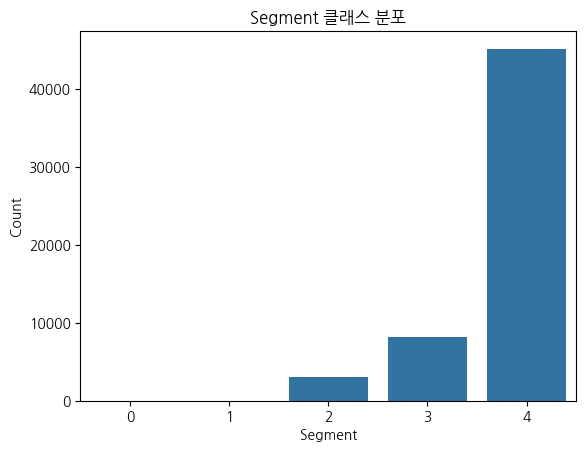

In [235]:
#Segment 클래스 분류 시각화 확인
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Segment 클래스 분포")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.show()

In [218]:
#SMOTE + RandomOverSampler 조합

from imblearn.over_sampling import SMOTE, RandomOverSampler
from collections import Counter
import pandas as pd

# 1. SMOTE로 클래스 2, 3 보완
smote = SMOTE(
    sampling_strategy={2: 40000, 3: 45000},  # 원하는 수치로 증강
    random_state=42
)
X_sm, y_sm = smote.fit_resample(X, y)

# 2. RandomOverSampler로 클래스 0, 1 복제
ros = RandomOverSampler(
    sampling_strategy={0: 35000, 1: 30000},  # 최소 1,000개로 맞춤
    random_state=42
)
X_resampled, y_resampled = ros.fit_resample(X_sm, y_sm)

# 확인
print("클래스 분포:")
print(pd.Series(y_resampled).value_counts())

ValueError: Found input variables with inconsistent numbers of samples: [70560, 56448]

In [205]:
# 하이퍼 파라미터 튜닝 및 앙상블

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import numpy as np

In [206]:
# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

In [207]:
# F1 scorer 정의
f1_macro = make_scorer(f1_score, average='macro')

In [208]:
#  XGBoost 튜닝 adelante 아델란테 뭔가 이름이나 그런거 같은데
param_xgb = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
grid_xgb = GridSearchCV(xgb, param_xgb, scoring=f1_macro, cv=3, n_jobs=-1)
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_

#  LightGBM 튜닝
param_lgb = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}
lgb = LGBMClassifier(random_state=42)
grid_lgb = GridSearchCV(lgb, param_lgb, scoring=f1_macro, cv=3, n_jobs=-1)
grid_lgb.fit(X_train, y_train)
best_lgb = grid_lgb.best_estimator_

#  CatBoost 기본 (튜닝은 선택)
cat = CatBoostClassifier(n_estimators=100, random_state=42, verbose=0)
cat.fit(X_train, y_train)

#  soft voting 예측
xgb_proba = best_xgb.predict_proba(X_val)
lgb_proba = best_lgb.predict_proba(X_val)
cat_proba = cat.predict_proba(X_val)

ensemble_proba = (xgb_proba + lgb_proba + cat_proba) / 3
ensemble_pred = np.argmax(ensemble_proba, axis=1)  # 가장 큰 값 반환

#  평가
print("F1 Score (macro):", f1_score(y_val, ensemble_pred, average='macro'))
print("F1 Score (weighted):", f1_score(y_val, ensemble_pred, average='weighted'))
print("\n📊 Classification Report:")
print(classification_report(y_val, ensemble_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:36:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9917
[LightGBM] [Info] Number of data points in the train set: 56448, number of used features: 64
[LightGBM] [Info] Start training from score -7.850033
[LightGBM] [Info] Start training from score -9.842463
[LightGBM] [Info] Start training from score -2.933708
[LightGBM] [Info] Start training from score -1.927236
[LightGBM] [Info] Start training from score -0.222134
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
